In [3]:
#!pip --version
#!pip install tensorflow



In [4]:
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import utils
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

## Подготовка данных для обучения сети

**Загружаем набор данных**

In [5]:
# В Keras встроены средства работы с популярными наборами данных
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

Список с названиями классов

In [24]:
classes = ['футболка', 'брюки', 'свитер', 'платье', 'пальто', 'туфли', 'рубашка', 'кроссовки', 'сумка', 'ботинки']

Просматриваем примеры изображений

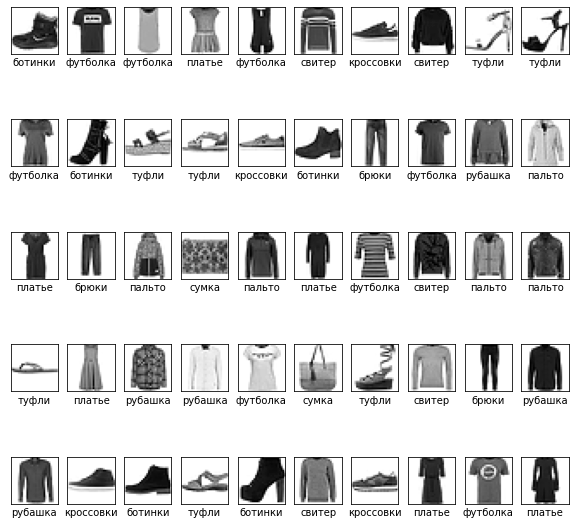

In [28]:
plt.figure(figsize=(10,10))
for i in range(0,50):
    plt.subplot(5,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(classes[y_train[i]])

**Преобразование размерности данных в наборе**

In [6]:
x_train = x_train.reshape(60000, 784)

**Нормализация данных**

In [7]:
# Векторизованные операции
# Применяются к каждому элементу массива отдельно
x_train = x_train / 255 

**Работа с правильными ответами**

Просматриваем пример правильного ответа

In [8]:
print(y_train[0])

9


**Преобразуем метки в формат one hot encoding**

In [9]:
y_train = utils.to_categorical(y_train, 10)

**Правильный ответ в формате one hot encoding**

In [10]:
print(y_train[0])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


## Создаем нейронную сеть

**Описываем архитектуру нейронной сети**

In [11]:
# Создаем последовательную модель
model = Sequential()
# Входной полносвязный слой, 800 нейронов, 784 входа в каждый нейрон
model.add(Dense(800, input_dim=784, activation="relu"))
# Выходной полносвязный слой, 10 нейронов (по количеству рукописных цифр)
model.add(Dense(10, activation="softmax"))

**Компилируем сеть**

In [12]:
model.compile(loss="categorical_crossentropy", optimizer="SGD", metrics=["accuracy"])

print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 800)               628000    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                8010      
Total params: 636,010
Trainable params: 636,010
Non-trainable params: 0
_________________________________________________________________
None


## Обучаем нейронную сеть

In [13]:
history = model.fit(x_train, y_train, 
                    batch_size=200, 
                    epochs=100,  
                    verbose=1)

Epoch 1/100
300/300 [==============================] - 1s 3ms/step - loss: 1.4962 - accuracy: 0.5584
Epoch 2/100
300/300 [==============================] - 1s 4ms/step - loss: 0.7592 - accuracy: 0.7624
Epoch 3/100
300/300 [==============================] - 1s 4ms/step - loss: 0.6520 - accuracy: 0.7949
Epoch 4/100
300/300 [==============================] - 1s 4ms/step - loss: 0.5971 - accuracy: 0.8089
Epoch 5/100
300/300 [==============================] - 1s 4ms/step - loss: 0.5598 - accuracy: 0.8183
Epoch 6/100
300/300 [==============================] - 1s 4ms/step - loss: 0.5408 - accuracy: 0.8225
Epoch 7/100
300/300 [==============================] - 1s 4ms/step - loss: 0.5208 - accuracy: 0.8276
Epoch 8/100
300/300 [==============================] - 1s 4ms/step - loss: 0.5019 - accuracy: 0.8330
Epoch 9/100
300/300 [==============================] - 1s 4ms/step - loss: 0.4922 - accuracy: 0.8362
Epoch 10/100
300/300 [==============================] - 1s 4ms/step - loss: 0.4736 - accura

## Используем сеть для распознавания моделей одежды

**Запускаем распознавание набора данных, на котором обучалась сеть**

In [14]:
predictions = model.predict(x_train)

**Проверяем качество распознавания**

Просматриваем пример изображения

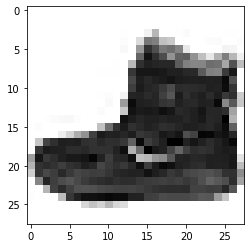

In [15]:
# Меняйте значение n чтобы просмотреть результаты распознавания других изображений
n = 0
plt.imshow(x_train[n].reshape(28, 28), cmap=plt.cm.binary)
plt.show()

Данные на выходе из сети в формате one-hot-encoding

In [16]:
print(predictions[n])

[1.1537419e-08 3.2301101e-10 4.0882214e-10 9.4011110e-10 4.8043108e-10
 1.7580925e-04 1.0552902e-07 1.2164320e-03 7.0330948e-06 9.9860066e-01]


Определяем номер класса изображения, который предлагает сеть

In [17]:
np.argmax(predictions[n])

9

Печатаем название класса

In [18]:
classes[np.argmax(predictions[n])]

'ботинки'

Печатаем номер класса правильного ответа

In [19]:
np.argmax(y_train[n])

9

Печатаем название класса правильного ответа

In [20]:
classes[np.argmax(y_train[n])]

'ботинки'